### Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [6]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

In [7]:
import seaborn as sns
import pandas as pd
import psycopg2

In [8]:
conn = psycopg2.connect(host="localhost", database="exames", user="postgres", password="postgres", port="5433")

# Relatorio 1

### Objetivo: Mostrar a quantidade e o preço total dos exames realizados.

In [9]:
quantidade = pd.read_sql_query("""
                            select exame_paciente.cd_exame as codigo,count(exame_paciente.cd_exame) as quantidade, tipo_exame, sum(preco) as preco_total  from exame_paciente
                            inner join exame
                            on exame_paciente.cd_exame = exame.cd_exame
                            group by exame_paciente.cd_exame, tipo_exame, preco;
                            """,conn)

In [10]:
quantidade

,codigo,quantidade,tipo_exame,preco_total
0,1,3,R.M,900.0
1,10,1,Sífilis,300.0
2,9,1,Meningite,200.0
3,6,3,Glicose,2100.0
4,4,1,Raio-X,210.0
5,5,1,HIV,90.0


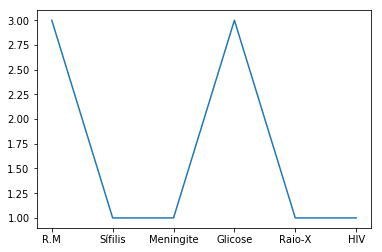

In [11]:
import matplotlib.pyplot as plt
plt.plot(quantidade.tipo_exame, quantidade.quantidade)

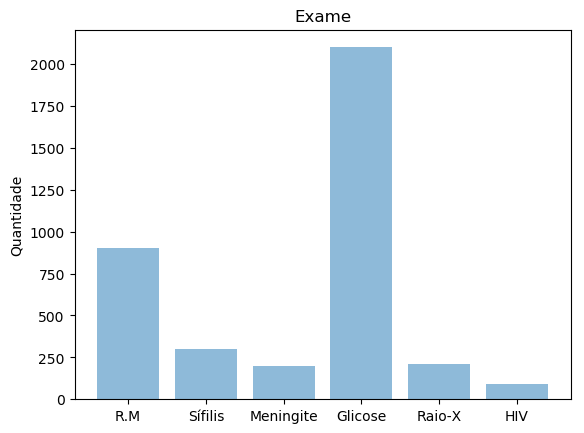

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(quantidade.tipo_exame)
y_pos = np.arange(len(objects))
performance = list(quantidade.preco_total)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade')
plt.title('Exame')
 
plt.show()

# Relatorio 2

### Objetivo: Relatorio sobre as unidades com relação aos bairros e cidades situados.

In [13]:
relatorio2 = pd.read_sql_query("""
                            select nm_pessoa, nm_bairro, nm_cidade from unidade
                            inner join bairro
                            on unidade.cd_bairro = bairro.cd_bairro
                            inner join cidade
                            on unidade.cd_cidade = cidade.cd_cidade
                            inner join pessoa
                            on unidade.fk_pessoa_id_pessoa = pessoa.id_pessoa;
                            """,conn)

In [14]:
relatorio2

,nm_pessoa,nm_bairro,nm_cidade
0,Unidade 1,JARDIM CAMBURI,VITORIA
1,Unidade 2,JACARAIPE,SERRA
2,Unidade 3,CENTRO,VITORIA
3,Unidade 4,JABOUR,VITORIA
4,Unidade 5,PRAIA DO CANTO,VITORIA
5,Unidade 6,MANGUINHOS,SERRA
6,Unidade 7,GOIABEIRAS,VITORIA
7,Unidade 8,LARANJEIRAS,SERRA
8,Unidade 9,JARDIM DA PENHA,VITORIA
9,Unidade 10,SANTA LUCIA,VITORIA


In [15]:
relatorio21 = pd.read_sql_query("""
                            select nm_cidade, count(unidade.cd_cidade) as unidades_cidade from unidade
                            inner join cidade
                            on unidade.cd_cidade = cidade.cd_cidade
                            group by nm_cidade;
                            """,conn)



In [16]:
relatorio21

,nm_cidade,unidades_cidade
0,SERRA,3
1,VITORIA,7


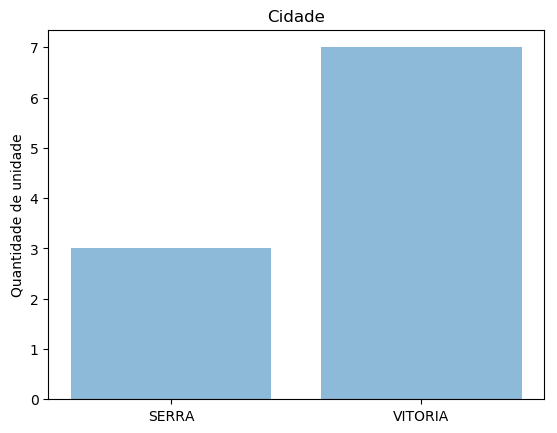

In [19]:
df = pd.DataFrame(relatorio21)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nm_cidade)
y_pos = np.arange(len(objects))
performance = list(df.unidades_cidade)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de unidade')
plt.title('Cidade')
 
plt.show()

In [17]:
relatorio22 = pd.read_sql_query("""
                            select nm_bairro, count(unidade.cd_bairro) as quantidade from unidade
                            inner join bairro
                            on unidade.cd_bairro = bairro.cd_bairro
                            group by nm_bairro;
                            """,conn)

In [18]:
relatorio22

,nm_bairro,quantidade
0,SANTA LUCIA,1
1,CENTRO,1
2,MANGUINHOS,1
3,JACARAIPE,1
4,PRAIA DO CANTO,1
5,JABOUR,1
6,JARDIM CAMBURI,1
7,JARDIM DA PENHA,1
8,LARANJEIRAS,1
9,GOIABEIRAS,1


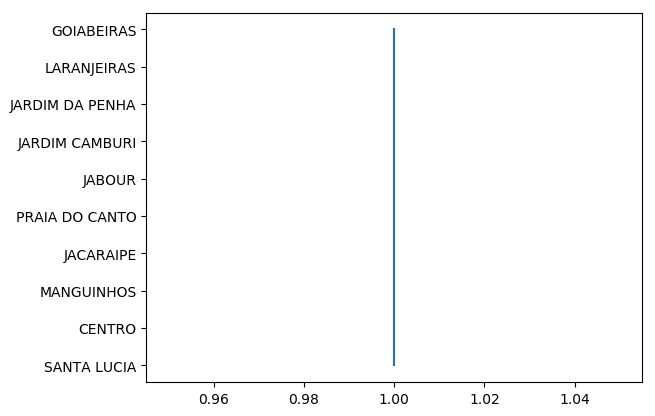

In [22]:
import matplotlib.pyplot as plt
plt.plot(relatorio22.quantidade, relatorio22.nm_bairro)

# Relatorio 3

### Objetivo: Mostrar a quantidade de medicos por especialidade, que estão cadastrados. Além de mostrar 

In [82]:
relatorio3 = pd.read_sql_query("""
                            select id_contato, contato.cd_tipo, nm_tipo from contato
                            inner join tipo_contato
                            on contato.cd_tipo = tipo_contato.cd_tipo;
                            """,conn)

In [83]:
relatorio3

,id_contato,cd_tipo,nm_tipo
0,1,103,Telefone Celular
1,2,103,Telefone Celular
2,3,103,Telefone Celular
3,4,102,Telefone Fixo
4,5,103,Telefone Celular
5,6,101,Email
6,8,103,Telefone Celular
7,9,103,Telefone Celular
8,10,103,Telefone Celular


In [40]:
relatorio31 = pd.read_sql_query("""
                            select nm_tipo, count(contato.cd_tipo) as quantidade from contato
                            inner join tipo_contato
                            on contato.cd_tipo = tipo_contato.cd_tipo
                            GROUP BY nm_tipo
                            """,conn)

In [41]:
relatorio31

,nm_tipo,quantidade
0,Email,1
1,Telefone Celular,7
2,Telefone Fixo,1


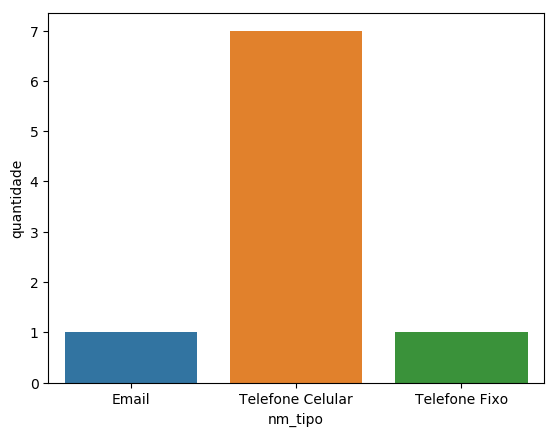

In [42]:
import seaborn as sns
sns.barplot(y="quantidade", x="nm_tipo",data=relatorio31,orient='v')

# Relatorio 4

### Objetivo: Mostrar a quantidade de exames realizados e exames não realizados. Além do preço dos exames que ja foram realizados.

In [44]:
relatorio4 = pd.read_sql_query("""
                            select count(realizado) as quantidade, realizado from exame_paciente
                            group by realizado;
                            """,conn)

In [45]:
relatorio4

,quantidade,realizado
0,7,N
1,3,S


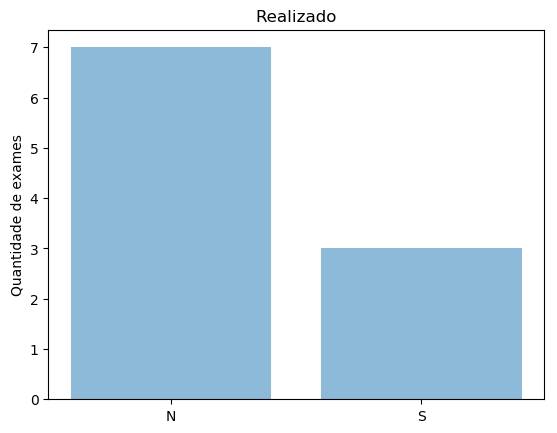

In [47]:
df = pd.DataFrame(relatorio4)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.realizado)
y_pos = np.arange(len(objects))
performance = list(df.quantidade)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de exames')
plt.title('Realizado')
 
plt.show()

In [55]:
relatorio41 = pd.read_sql_query("""
                            select exame_paciente.cd_exame,tipo_exame, count(realizado) as quantidade, sum(preco) as preco_total from exame_paciente
                            inner join exame
                            on exame_paciente.cd_exame = exame.cd_exame
                            where realizado = 'N'
                            group by tipo_exame, realizado,exame_paciente.cd_exame,tipo_exame
                            """,conn)

In [56]:
relatorio41

,cd_exame,tipo_exame,quantidade,preco_total
0,6,Glicose,3,2100.0
1,5,HIV,1,90.0
2,1,R.M,2,600.0
3,10,Sífilis,1,300.0


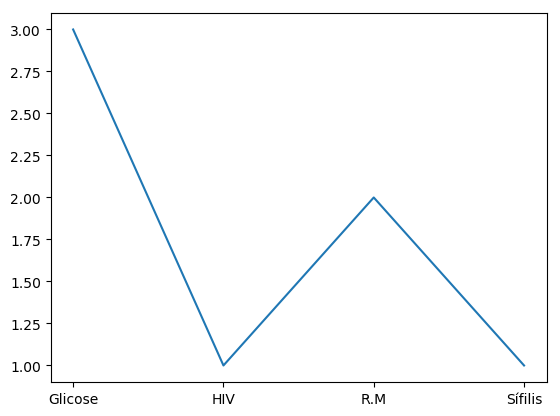

In [57]:
import matplotlib.pyplot as plt
plt.plot(relatorio41.tipo_exame, relatorio41.quantidade)

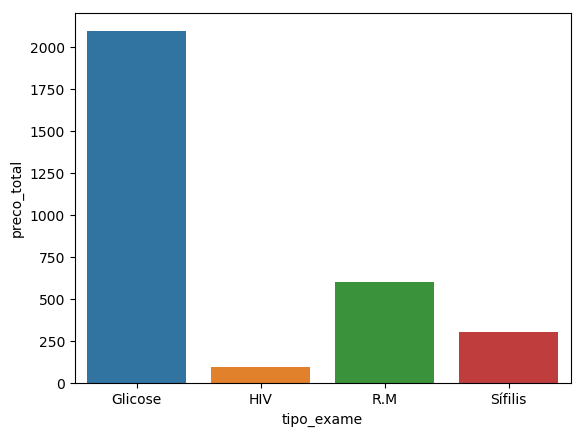

In [59]:
import seaborn as sns
sns.barplot(y="preco_total", x="tipo_exame",data=relatorio41,orient='v')

# Relatorio 5

### Objetivo: Mostrar a quantidade de exames por especialidade. Além de mostrar a quantidade de pedidos de exames por cada especialidade, mostrando também a quantidade desses exames.

In [78]:
relatorio5 = pd.read_sql_query("""
                            select nm_especialidade, count(nm_especialidade) as quantidade from medico
                            inner join especialidade
                            on medico.cd_especialidade = especialidade.cd_especialidade
                            group by nm_especialidade
                            """,conn)

In [79]:
relatorio5

,nm_especialidade,quantidade
0,Geral,3
1,Pediatra,1
2,Obstetra,1
3,Ortopedista,1
4,Dentista,1
5,Cardiologista,2
6,Neurologista,1


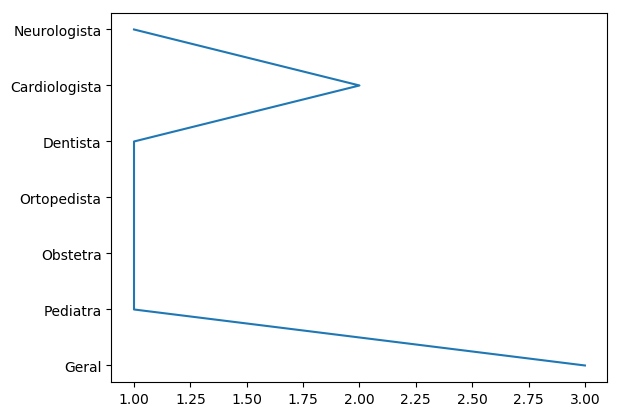

In [80]:
import matplotlib.pyplot as plt
plt.plot(relatorio5.quantidade, relatorio5.nm_especialidade)

In [81]:
relatorio51 = pd.read_sql_query("""
                            select nm_especialidade, count(tipo_exame) as quantidade, tipo_exame from medico
                            inner join exame_paciente
                            on medico.crm_medico = exame_paciente.crm_medico
                            inner join especialidade
                            on medico.cd_especialidade = especialidade.cd_especialidade
                            inner join exame
                            on exame_paciente.cd_exame = exame.cd_exame
                            group by tipo_exame, nm_especialidade
                            """,conn)

In [77]:
relatorio51

,nm_especialidade,quantidade,tipo_exame
0,Geral,2,R.M
1,Obstetra,1,Raio-X
2,Cardiologista,1,HIV
3,Pediatra,1,R.M
4,Dentista,1,Sífilis
5,Cardiologista,1,Meningite
6,Geral,2,Glicose
7,Neurologista,1,Glicose
